# Classy background module

Start by importing packages to be used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})


Define our instance of Class from classy, conventionally named "cosmo". Each Instance will store a single cosmology at a given time.

In [2]:
# Initialise the Class instance
cosmo = Class()

Each instance of Class is initialised with the default values for all cosmological parameters, and is ready to compute.

When asking the wrapper for output, the cosmology will automatically be computed up to the necessary module to produce this output, here we are asking for the background

In [3]:
# Exctract dictionary of background quantities
bg = cosmo.get_background()

# Print its keys: these are the contents of the dictionary
print(bg.keys())

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


In [4]:
# Here I define a few quantities from the dictionary
z = bg['z']
rho_cdm = bg['(.)rho_cdm']
rho_crit = bg['(.)rho_crit']

# Now use the same syntax to define the baryon and photon energy densities
# rho_b = ???
# rho_phot = ???

Text(0, 0.5, '$ \\frac{8\\pi G}{3}\\rho_i$ [Mpc$^{-2}$]')

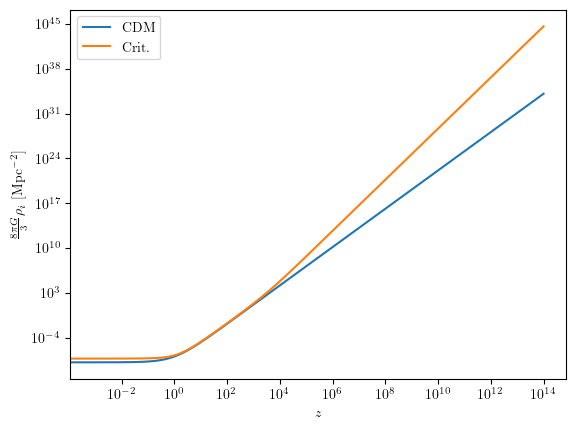

In [5]:
plt.loglog(z,rho_cdm,label='CDM')
plt.loglog(z,rho_crit,label='Crit.')

# Uncomment these lines when you have correctly set the quantities to plot

# plt.loglog(z,rho_phot,label='Photons')
# plt.loglog(z,rho_lambda,label='$\Lambda$')

plt.legend()

plt.xlabel('$z$')
plt.ylabel('$ \\frac{8\\pi G}{3}\\rho_i$ [Mpc$^{-2}$]')

Let's define an identical cosmology, except with 50% more baryonic matter.

In [6]:
# Define new Class instance
cosmo_extra_baryons = Class()

#set omega_b parameter
cosmo_extra_baryons.set({'Omega_b':cosmo.Omega_b()*1.5})

True

In [7]:
cosmo_extra_baryons.age()/cosmo.age()

0.9788812637149618

And another one, which has increased dark matter density instead of baryonic.

In [8]:
# Define new Class instance
cosmo_extra_dm = Class()

#set omega_b parameter
cosmo_extra_dm.set({'Omega_cdm':cosmo.Omega0_cdm()*1.5})

True

Lets do another plot, showing explicitly the times of matter/radiation equality for the standard and extra DM cosmologies

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_113986/3772054721.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(cosmo.z_eq(),color='0.3',linestyle='--',label='$z_{\mathrm{eq}}$ (standard)')


Text(0, 0.5, '$ \\frac{8\\pi G}{3}\\rho_i$ [Mpc$^{-2}$]')

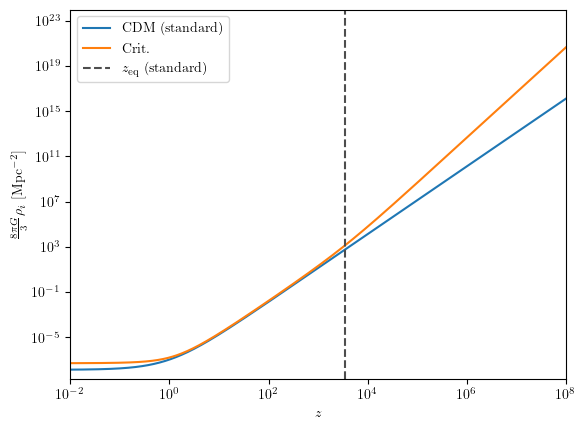

In [9]:
plt.loglog(z,rho_cdm,label='CDM (standard)')
plt.loglog(z,rho_crit,label='Crit.')

# Uncomment these lines when you have correctly set the quantities to plot

# plt.loglog(z,rho_phot,label='Photons')
# plt.loglog(z,rho_cdm_extra_dm,label='CDM (extra DM)')

plt.axvline(cosmo.z_eq(),color='0.3',linestyle='--',label='$z_{\mathrm{eq}}$ (standard)')
# plt.axvline(z_eq_extra_dm,color='0.3',linestyle=':',label='$z_{\mathrm{eq}}$ (extra DM)')


plt.legend()

plt.xlim([1e-2,1e8])
plt.ylim([2e-9,1e24])

plt.xlabel('$z$')
plt.ylabel('$ \\frac{8\\pi G}{3}\\rho_i$ [Mpc$^{-2}$]')

In [17]:
cosmo.Omega0_m()

0.30988304304812053